## Spam Filter

In [1]:
import numpy as np
import pandas as pd
from os import walk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get the name of the csv files in the data directory
_, _, filenames = next(walk("./data/"))

In [3]:
#reading and merging all the data
df = pd.DataFrame()
for file in filenames:
    temp_df = pd.read_csv("./data/"+file, encoding='utf-8-sig')
    df = pd.concat([df, temp_df], ignore_index=True)
    
df.columns = df.columns.str.lower()

In [4]:
df.head()

,comment_id,author,date,content,class
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


In [5]:
#drop unnecessary columns
df = df[["content" ,"class"]]

In [6]:
df.head()

,content,class
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0


In [7]:
df.shape

(1956, 2)

In [8]:
df[df.duplicated(keep=False)]

,content,class
10,I love this song so much﻿,0
43,Nice﻿,0
45,Love this song makes me wanna dance! ﻿,0
48,Check out this video on YouTube:﻿,1
56,Check out this video on YouTube:﻿,1
...,...,...
1884,Check out this video on YouTube:﻿,1
1888,hey its M.E.S here I&#39;m a young up and comi...,1
1896,hey its M.E.S here I&#39;m a young up and comi...,1
1900,awesome﻿,0


In [9]:
#drop duplicated rows
df.drop_duplicates(inplace = True)
df.shape

(1760, 2)

In [10]:
df["class"].value_counts()

0    919
1    841
Name: class, dtype: int64

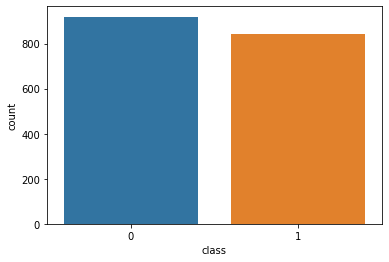

In [11]:
sns.countplot(x='class',data=df)
plt.show()

The dataset is not balanced but there is not a huge gap between classes.

In [12]:
#selecting spam data
spam = df[df["class"] == 1]
#selecting not spam data with the size of spam data
ham = df[df["class"] == 0].sample(spam.shape[0])

#merge data again
df_balanced = pd.concat([ham, spam])
df_balanced.shape   #841*2

(1682, 2)

In [13]:
#add a new column to see the length of the comments
df_balanced["length"] = df_balanced["content"].apply(len)

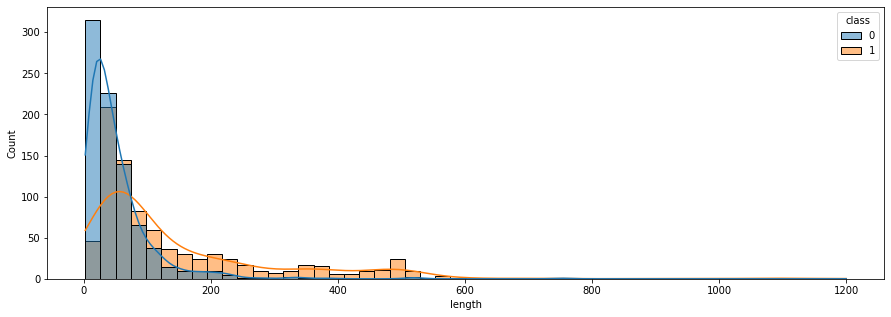

In [14]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df_balanced, x="length", kde=True, bins=50, hue="class")
plt.show()

According to the graph above, we can say that spam comments are longer than non-spam comments

In [15]:
import re
"""
Clean the text data

Inputs(text): any text data
Outputs (text): 
"""
def clean_data(data):
    data = data.lower()
    #remove things caused by encoding
    data = data.replace("\ufeff", "")
    
    #remove html tags
    no_html = re.sub("<[^>]*>", "", data)   
    
    #remove urls
    no_url = re.sub("http\S+", "", no_html)
    
    #pattern of emojis
    emoji_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    #remove emojis
    no_emoji = emoji_pattern.sub("", no_url)
    
    #remove numbers
    no_num = re.sub(r"[0-9]", "", no_emoji)
    
    #remove punctuation
    no_punc = re.sub("[^\w\s]", "", no_num)
    
    #remove repated letters
    normalized = re.sub(r'(\w)\1+', r'\1', no_punc) 
    return normalized


In [16]:
#apply clean_data function to all the comments
df_balanced["content"] = df_balanced["content"].apply(clean_data)

#drop the length column
df_balanced = df_balanced.drop("length", axis=1)

In [17]:
#save the cleaned dataset as a cvs file
df_balanced.to_csv("all_data.csv", index=False)